# SOLUTION PROBLEM SET 9
*Ökonomische Entscheidungen und Märkte IK* <br>
Alexander Ahammer  <br>
www.alexander-ahammer.com/teaching  <br>
Date: 2020/6/21

## Exercise 1

D: w(l) = -5/2*l + 71/4
S: w(l) = 5/3*l + 9/2


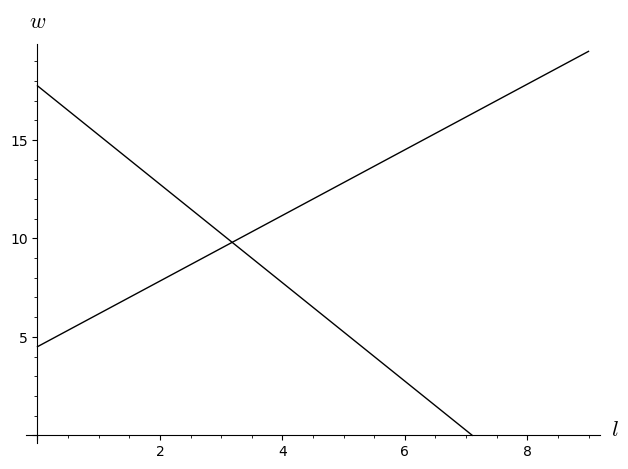

In [1]:
var('l, w')

# supply and demand
lS(w) = -2.7 + 0.6*w
lD(w) = 7.1 - 0.4*w

# inverse curves
D(l) = solve(lD(w)==l, w)[0].rhs()
print("D: w(l) =", D(l))

S(l) = solve(lS(w)==l, w)[0].rhs()
print("S: w(l) =", S(l))

# zeros on the horizontal
l_D0 = solve(D(l)==0, l)[0].rhs()
l_S0 = solve(S(l)==0, l)[0].rhs()
w_D0 = 71/4
w_S0 = 9/2

# plot partial market
p_D = plot(D(l), (l, 0, l_D0), ymin=0, color='black', axes_labels=['$l$', '$w$'])
p_S = plot(S(l), (l, 0, 9), ymin=0, color='black')
p_market = p_D + p_S
p_market

In order to obtain the rents from this graph, we first have to calculate the equilibrium and some points on the axes.

In [2]:
# Equilibrium
l_opt = RR(solve(D(l)==S(l), l)[0].rhs())
w_opt = D(l_opt)
print("l* =", l_opt, "; w* =", w_opt)

l* = 3.18000000000000 ; w* = 9.80000000000000


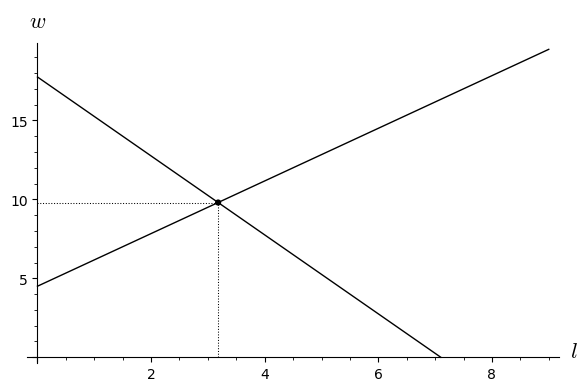

In [3]:
p_eq  = line([(0, w_opt), (l_opt, w_opt)], color='black', thickness=0.75, linestyle=':')
p_eq += line([(l_opt, 0), (l_opt, w_opt)], color='black', thickness=0.75, linestyle=':')
p_eq += point((l_opt, w_opt), size=20, color='black')
p_market + p_eq

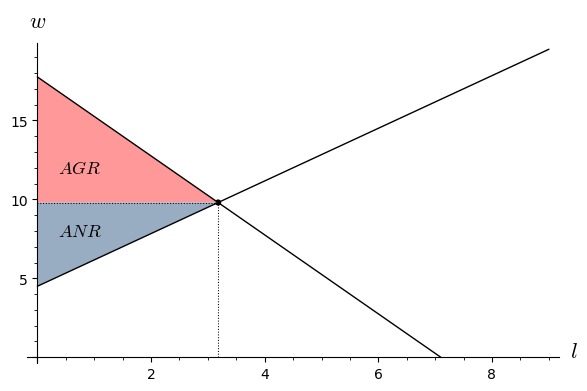

In [4]:
# color areas
p_KR  = polygon([(0, w_D0), (l_opt, w_opt), (0, w_opt)], rgbcolor='#ff9999', aspect_ratio='automatic')
p_KR += text("$AGR$", (.75, 12), fontsize=13, color='black')
p_PR  = polygon([(0, w_opt), (l_opt, w_opt), (0, w_S0)], rgbcolor='#99adc2', aspect_ratio='automatic')
p_PR += text("$ANR$", (.75, 8), fontsize=13, color='black')
p_market + p_eq + p_KR + p_PR

In [5]:
# calculate areas
AGR = ((w_D0 - w_opt)*l_opt)/2
print("AGR =", AGR)

ANR = ((w_opt - w_S0)*l_opt)/2
print("ANR =", ANR)

NW = AGR + ANR
print("NW =", NW)

AGR = 12.6405000000000
ANR = 8.42700000000000
NW = 21.0675000000000


In [6]:
# check by calculating integrals
AGR_int = (D(l)).integral(l, 0, l_opt) - (w_opt*l_opt)
print("AGR integrated =", AGR_int)

ANR_int = (w_opt*l_opt) - (S(l)).integral(l, 0, l_opt)
print("ANR integrated =", ANR_int)

NW_int = (D(l)).integral(l, 0, l_opt) - (S(l)).integral(l, 0, l_opt)
print("NW integrated =", NW_int)

AGR integrated = 12.640499999999992
ANR integrated = 8.42700000000000
NW integrated = 21.067499999999995


### Interpretation
**Firm rent:** The firm rent ($AGR$) measures the difference between the wage the firms were ready to pay and the actual market wage $w^*$, aggregated over each unit of labor.

**Worker rent:** The worker rent ($ANR$) is the difference between the market wage $w^*$ and the workers' reservation wage (i.e., the wage which has to be offered so that workers start working), aggregated over each unit of labor. 

In [7]:
# export figures
(p_market + p_eq).save('E:/Dropbox/teaching/oem/problem_sets/solutions/diags/PS9_1.pdf')
(p_market + p_eq + p_KR + p_PR).save('E:/Dropbox/teaching/oem/problem_sets/solutions/diags/PS9_2.pdf')